- tnesor(텐서) : 다차원 배열

In [82]:
import torch
X = torch.Tensor(2,3)

In [83]:
X

tensor([[8.3571e+20, 1.3283e-08, 1.0860e-05],
        [2.6851e-06, 4.1256e-08, 2.0912e+20]])

In [84]:
X = torch.Tensor([[1,2,3],[4,5,6]])

In [85]:
X

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [86]:
x_tensor = torch.tensor(data=[2.0,3.0],requires_grad=True)
x_tensor

tensor([2., 3.], requires_grad=True)

In [87]:
x = torch.tensor(data=[2.0,3.0],requires_grad=True)
y = x**2
z = 2*y+3

In [88]:
target = torch.tensor([3.0,4.0])

In [89]:
loss = torch.sum(torch.abs(z-target))

In [90]:
loss.backward()

In [91]:
print(x.grad,y.grad,z.grad)

tensor([ 8., 12.]) None None


C:\Users\user\Anaconda3\envs\pytorch\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


In [92]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

# 데이터나 학습 결과를 출력하기 위해 사용합니다.
import matplotlib.pyplot as plt

In [93]:
num_data = 1000
num_epoch = 500

In [94]:
x = init.uniform_(torch.Tensor(num_data,1),-10,10)
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
y = 2*x + 3
y_noise = y + noise

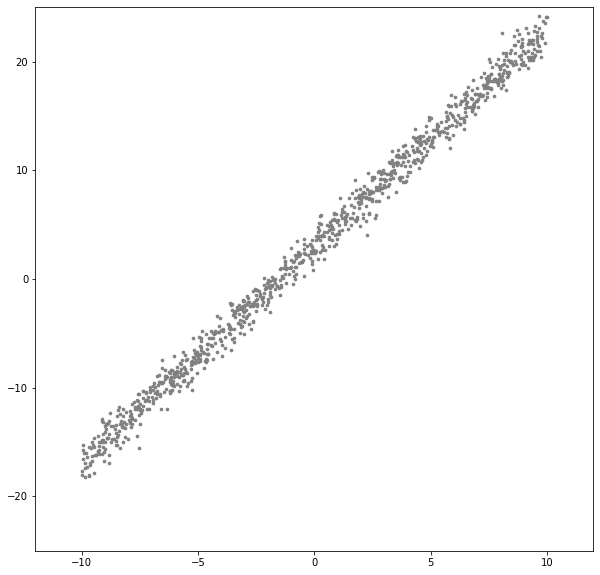

In [95]:
# figure의 크기를 지정해줍니다.
plt.figure(figsize=(10,10))

# x축에는 x를 사용하고 y축에는 y_noise를 사용해 scatter plot 해줍니다.
# 이때 점의 크기는 7, 점의 색상은 회색으로 임의로 지정했습니다.
plt.scatter(x.numpy(),y_noise.numpy(),s=7,c="gray")

# figure의 x,y 축 범위를 지정해줍니다.
plt.axis([-12, 12, -25, 25])

# figure를 출력합니다.
plt.show()

In [96]:
model = nn.Linear(1,1)
loss_func = nn.L1Loss()

In [97]:
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [98]:
# 손실이 어떻게 변하는지 확인하기 위해 loss_arr를 만들어 기록합니다.
loss_arr =[]
label = y_noise 
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output,label)
    loss.backward()
    optimizer.step()
    
    if i % 10 ==0:
        print(loss.data)
    loss_arr.append(loss.detach().numpy())
    
param_list = list(model.parameters())
print(param_list[0].item(),param_list[1].item())    

tensor(12.3881)
tensor(10.0051)
tensor(7.7365)
tensor(5.7452)
tensor(4.3235)
tensor(3.8979)
tensor(3.7474)
tensor(3.6299)
tensor(3.5242)
tensor(3.4208)
tensor(3.3183)
tensor(3.2168)
tensor(3.1165)
tensor(3.0168)
tensor(2.9172)
tensor(2.8179)
tensor(2.7185)
tensor(2.6193)
tensor(2.5202)
tensor(2.4217)
tensor(2.3240)
tensor(2.2269)
tensor(2.1305)
tensor(2.0363)
tensor(1.9451)
tensor(1.8549)
tensor(1.7675)
tensor(1.6834)
tensor(1.6050)
tensor(1.5310)
tensor(1.4612)
tensor(1.3950)
tensor(1.3328)
tensor(1.2744)
tensor(1.2189)
tensor(1.1668)
tensor(1.1199)
tensor(1.0772)
tensor(1.0387)
tensor(1.0044)
tensor(0.9741)
tensor(0.9465)
tensor(0.9223)
tensor(0.9011)
tensor(0.8823)
tensor(0.8664)
tensor(0.8531)
tensor(0.8415)
tensor(0.8318)
tensor(0.8237)
1.9851244688034058 2.717940330505371


In [99]:
param_list[0]

Parameter containing:
tensor([[1.9851]], requires_grad=True)

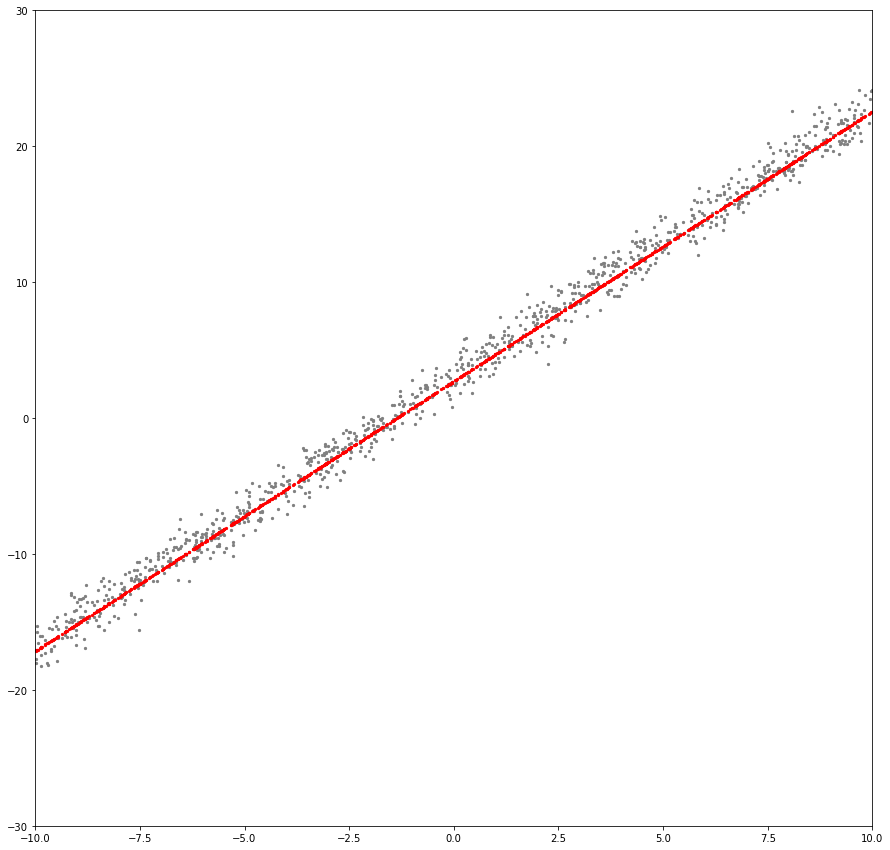

In [100]:
plt.figure(figsize=(15,15))
plt.scatter(x.numpy(),y_noise.numpy(),s=5,c="gray")
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="red")
plt.axis([-10, 10, -30, 30])
plt.show()

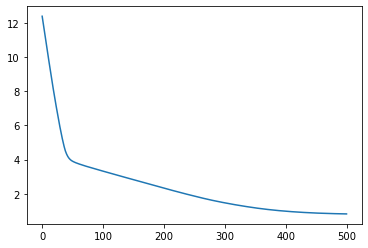

In [101]:
# matplotlib의 plot 함수를 이용해 손실이 어떻게 줄어가는지 확인합니다. 
plt.plot(loss_arr)
plt.show()

In [102]:
# 현재 모델은 weight와 bias을 변수로 가지고 있는데 그 값들이 학습 후 실제 몇인지 수치적으로 확인해봅니다.
param_list = list(model.parameters())
print("Weight:",param_list[0].item(),"\nBias:  ",param_list[1].item())

Weight: 1.9851244688034058 
Bias:   2.717940330505371
